In [1]:
import pandas as pd
import numpy as np

SciANN_df = pd.read_csv('SciANN_collected_info_varying_noise.csv')
SciANN_df['Tag'] = 'SciANN'

FBPINN_df = pd.read_csv('FBPINN_collected_info_varying_noise.csv')
FBPINN_df['Tag'] = 'FBPINN'
# print(FBPINN_df.head())
# print(SciANN_df.head())

In [2]:
# merge these two dataframes
merged_df = pd.concat([SciANN_df, FBPINN_df])
merged_df.tail()

,Time Limit,Noise Level,MSE Learned,MSE Test,Model Type,Learned Parameters,Tag
49,0-24,0.01,0.000006,0.000004,survival,[0.3749 0.3001 0.5982 0.8094 0.2583],FBPINN
50,0-24,0.02,0.000020,0.000017,survival,[0.2682 0.3002 0.5969 0.9793 0.2103],FBPINN
51,0-24,0.03,0.000036,0.000042,survival,[0.1573 0.3002 0.5962 1.3991 0.0985],FBPINN
52,0-24,0.04,0.000068,0.000071,survival,[0.1039 0.3004 0.5956 1.9043 0.0041],FBPINN
53,0-24,0.05,0.000105,0.000110,survival,[0.0841 0.3005 0.5957 2.2219 0.0317],FBPINN


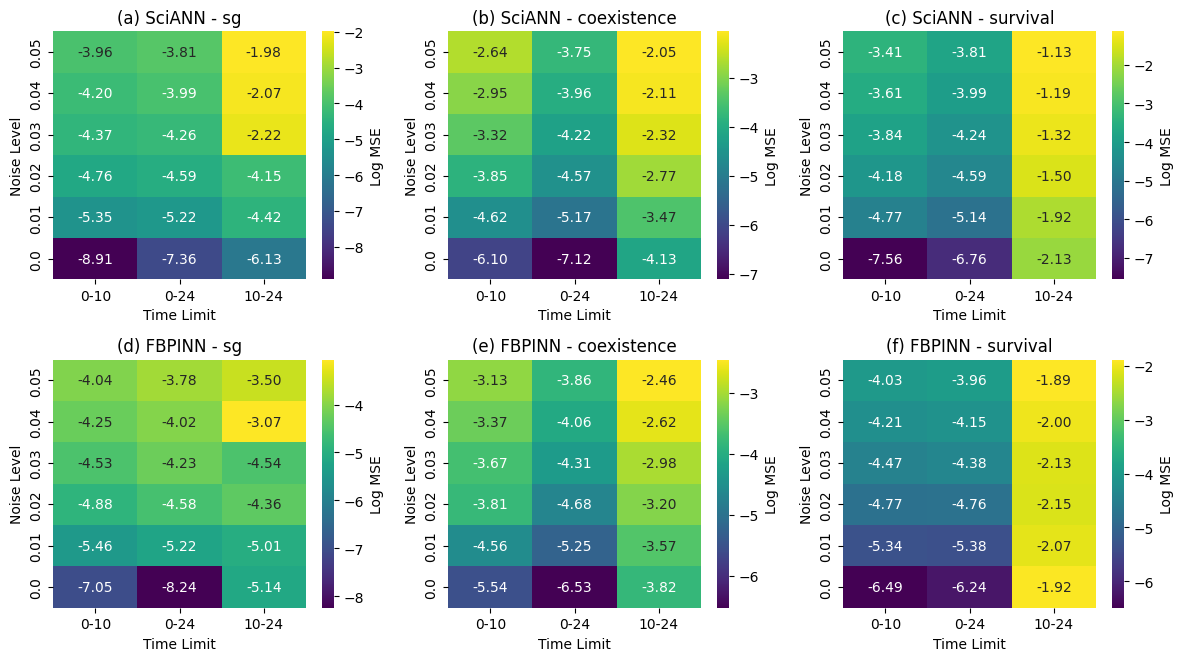

In [3]:
# make a 3x2 grid of subplots
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
merged_df['MSE Learned'] = pd.to_numeric(merged_df['MSE Learned'], errors='coerce')
merged_df['MSE Test'] = pd.to_numeric(merged_df['MSE Test'], errors='coerce')

# Define the tags and model types
tags = ['SciANN', 'FBPINN']
model_types = ['sg', 'coexistence', 'survival']
time_limits = ['0-10', '10-24', '0-24']
fig_tag = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Loop through each tag and model type to create the pivot plot
for i, tag in enumerate(tags):
    for j, model_type in enumerate(model_types):
        # Filter the dataframe
        df_filtered = merged_df[(merged_df['Tag'] == tag) & (merged_df['Model Type'] == model_type)]
        
        # # Create a pivot table
        pivot_test = df_filtered.pivot(index="Noise Level", columns="Time Limit", values="MSE Test")
        pivot_test_log = pivot_test.map(lambda x: np.log10(x + 1e-10))
        
        # Plot the heatmap
        sns.heatmap(pivot_test_log, annot=True, fmt=".2f", cmap='viridis',  cbar_kws={'label': 'Log MSE'}, ax=axes[i, j])
        
        # Set titles and labels
        axes[i, j].set_title(f'{fig_tag[i*3+j]} {tag} - {model_type}')
        axes[i, j].set_xlabel('Time Limit')
        axes[i, j].set_ylabel('Noise Level')
        axes[i, j].invert_yaxis()
        axes[i, j].tick_params(axis='y', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
# save the plot
plt.savefig('MSE_heatmap_SciANN_Vs_FBPINN_Noise.png')


In [4]:
merged_df.head()

,Time Limit,Noise Level,MSE Learned,MSE Test,Model Type,Learned Parameters,Tag
0,0-10,0.01,0.000003,0.000004,sg,0.9983711963700482,SciANN
1,0-10,0.02,0.000012,0.000017,sg,0.9966552526428825,SciANN
2,0-10,0.03,0.000028,0.000043,sg,0.9948808386121102,SciANN
3,0-10,0.04,0.000048,0.000064,sg,0.9932222502643883,SciANN
4,0-10,0.05,0.000074,0.000109,sg,0.9916172260136206,SciANN


In [5]:
params_type = {
    'sg': 1,
    'coexistence': [0.5, 0.7, 0.3, 0.3, 0.6],
    'survival': [0.5, 0.3, 0.6, 0.7, 0.3]
}
merged_df['True Param'] = merged_df['Model Type'].map(params_type)
merged_df.reset_index(drop=True, inplace=True)
merged_df.tail()

,Time Limit,Noise Level,MSE Learned,MSE Test,Model Type,Learned Parameters,Tag,True Param
103,0-24,0.01,0.000006,0.000004,survival,[0.3749 0.3001 0.5982 0.8094 0.2583],FBPINN,"[0.5, 0.3, 0.6, 0.7, 0.3]"
104,0-24,0.02,0.000020,0.000017,survival,[0.2682 0.3002 0.5969 0.9793 0.2103],FBPINN,"[0.5, 0.3, 0.6, 0.7, 0.3]"
105,0-24,0.03,0.000036,0.000042,survival,[0.1573 0.3002 0.5962 1.3991 0.0985],FBPINN,"[0.5, 0.3, 0.6, 0.7, 0.3]"
106,0-24,0.04,0.000068,0.000071,survival,[0.1039 0.3004 0.5956 1.9043 0.0041],FBPINN,"[0.5, 0.3, 0.6, 0.7, 0.3]"
107,0-24,0.05,0.000105,0.000110,survival,[0.0841 0.3005 0.5957 2.2219 0.0317],FBPINN,"[0.5, 0.3, 0.6, 0.7, 0.3]"
